# ME 7160 Nonlinear Dynamics Weekend HW1 12SEPT2015

* Determine the potetial funtion (by integrating $F(u)$) and sketch it as a contour plot for the various scenarios (3 total). See notes at the end of Ch. 1.

$$\ddot{u}+u-\frac{\lambda}{a-u}=0$$

**1. First we determine the 3 scenarios for the above function:**

 Set $\ddot{u}=0$ to get the following expression: $u-\frac{\lambda}{a-u}=0$,   since this is a quadratic function the roots will come in the form of.
 
 $$\frac{a}{2}\pm\frac{\sqrt{a^{2}-4\lambda}}{2}$$
 
 From this we can get the following 3 cases:  
* $a^{2}-4\lambda>0$ (2 real roots) so $a^{2}>4\lambda$  
* $a^{2}-4\lambda=0$ (repeated roots) so $\lambda=\frac{a^{2}}{4}$  
* $a^{2}-4\lambda<0$ (imaginary roots) so $a^{2}<4\lambda$  

**2. Since we have the 3 conditions next potential function is determined:**

  Starting with $\ddot{u}+u-\frac{\lambda}{a-u}=0$, multiply by $\dot{u}$ and integrate:
  
  $\int \ddot{u}\dot{u}dt + \int (u-\frac{\lambda}{a-u})\dot{u}dt=h$  
  
  $\int \frac{d\dot{u}}{dt}\frac{du}{dt}dt + \int (u-\frac{\lambda}{a-u})\frac{du}{dt}dt=h$  
  
  $\int \dot{u}d\dot{u} + \int (u-\frac{\lambda}{a-u})du=h$  
  
  $\frac{1}{2}\dot{u}^{2} + \frac{1}{2}u^{2} + \lambda ln|a-u|=h$
  
  ### $h=\frac{1}{2}\dot{u}^{2} + \frac{1}{2}u^{2} + \lambda ln|a-u|$  
  
  The above expression is now used to generate the contour plots for the three cases.  

In [14]:
%matplotlib inline
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pylab

def SolFun(a=0, y=0, a_lim=[-1, 1, -1 ,1], Sol_Space=[-5, 5], line_den=100):

    test=a**2-4*y

    fig = plt.figure()
    #ax callout needed to genereate a surfc type of plot
    ax = fig.gca(projection='3d')

    u=np.linspace(Sol_Space[0], Sol_Space[1], 200)
    udot=np.linspace(Sol_Space[0], Sol_Space[1], 200)
    U, Udot = np.meshgrid(u,udot)

    #Define mechanical energy and surface plot
    h=(1/2) * (Udot**2) + (1/2) * (U**2) + y * np.log(np.abs(a-U))

    #Surface plot
    ax.plot_surface(U, Udot, h, rstride=8, cstride=8, cmap=cm.autumn)

    #One can have coutour projections on all 3 primary faces
    cset = ax.contour(U, Udot, h, zdir='z', offset=-100, cmap=cm.coolwarm)
    #cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
    #cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

    xmin=min(u)-5
    xmax=max(u)+5
    ymin=min(udot)-5
    ymax=max(udot)+5

    hmin=h.min()-5
    hmax=h.max()+5

    ax.set_xlabel('$U$')
    ax.set_xlim(xmin, xmax)
    ax.set_ylabel('$\dot{U}$')
    ax.set_ylim(ymin, ymax)
    ax.set_zlabel('h')
    ax.set_zlim(hmin, hmax)
    plt.title('Surface plot of mechanical energy with $a^{2}-4\lambda$= ' + str(test), fontsize=10)

    #Plotting just the contour
    plt.figure()
    plt.contour(U, Udot, h, line_den)
    plt.title('Contour plot for $a^{2}-4\lambda$=' + str(test))
    plt.xlabel('$U$')
    plt.ylabel('$\dot{U}$')
    plt.axis(a_lim)

    #Numerical solution to the given system-----------------------------------------
    def deriv(x,t):
        return np.array([x[1], -x[0] + y/(a-x[0])])

    time=np.linspace(0.0,100,2000)
    xinit=np.array([1, 1])
    x=odeint(deriv, xinit, time)

    #Plot the response
    fig=plt.figure()
    plt.plot(time,x[:,0])
    plt.axis([0, 20, -6, 6])
    fig.suptitle('Plot x(t) versus time(t) for $a^{2}-4\lambda$= ' + str(test), fontsize=15)
    plt.xlabel('Time, t')
    plt.ylabel('x(t)')
    plt.grid()

    #Plot phase diagram
    fig=plt.figure()
    plt.plot(x[:,0],x[:,1])
    plt.axis([-10, 10, -6, 6])
    fig.suptitle('Plot x(t) versus time(t) for $a^{2}-4\lambda$=' + str(test), fontsize=15)
    plt.xlabel('$U$')
    plt.ylabel('$\dot{U}$')
    plt.grid()
    #Numerical solution end---------------------------------------------------------

    plt.show()

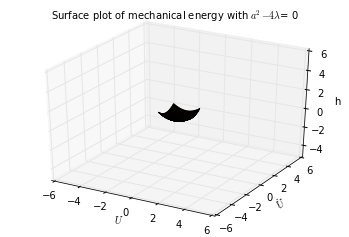

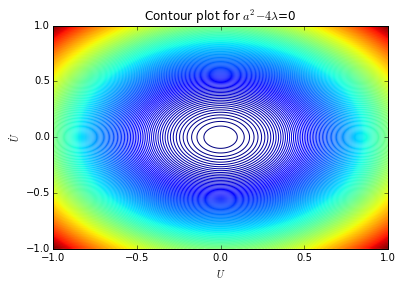

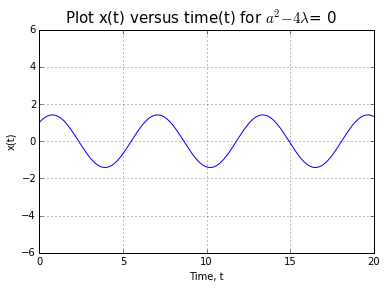

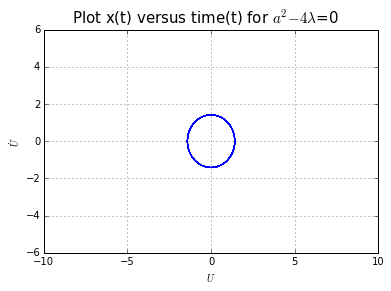

In [17]:
SolFun(a=0, y=0, a_lim=[-1, 1, -1 ,1], Sol_Space=[-1, 1], line_den=200)

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


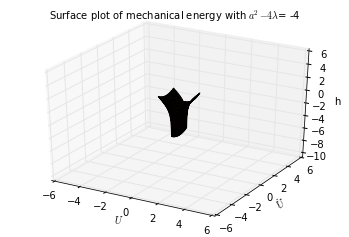

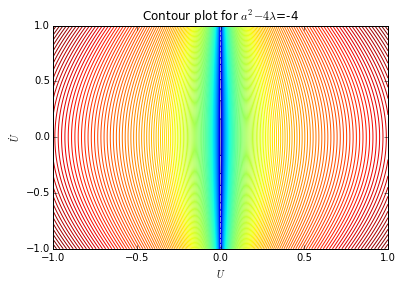

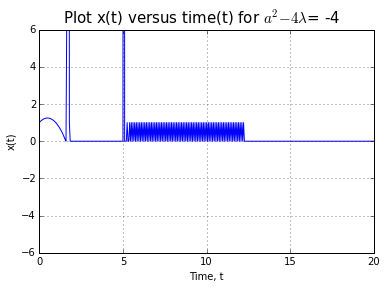

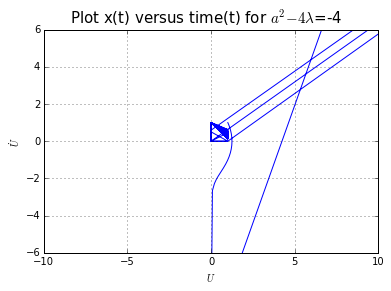

In [18]:
SolFun(a=0, y=1, a_lim=[-1, 1, -1 ,1], Sol_Space=[-1, 1], line_den=200)

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


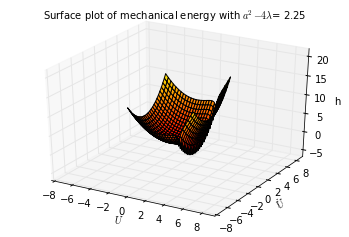

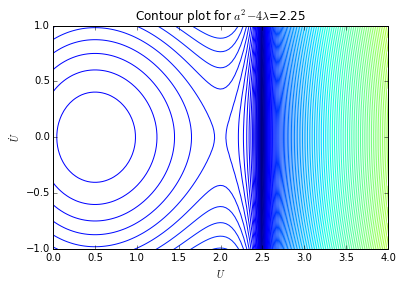

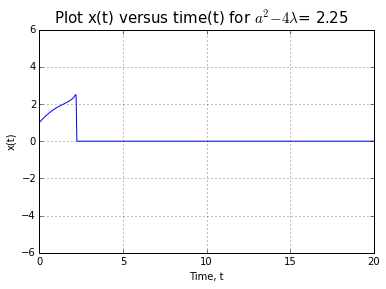

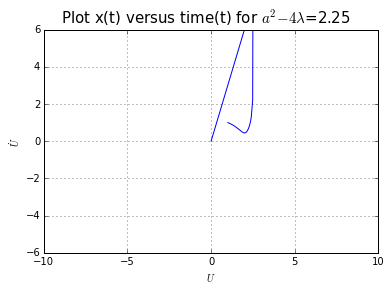

In [24]:
SolFun(a=2.5, y=1, a_lim=[0, 4, -1 ,1], Sol_Space=[-3, 4], line_den=200)

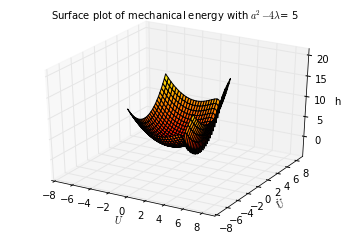

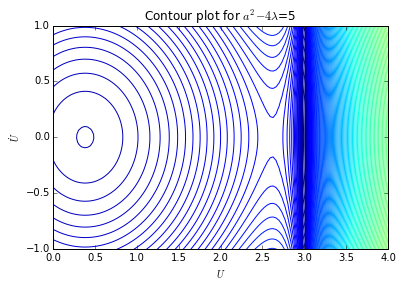

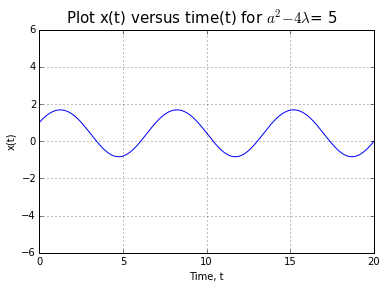

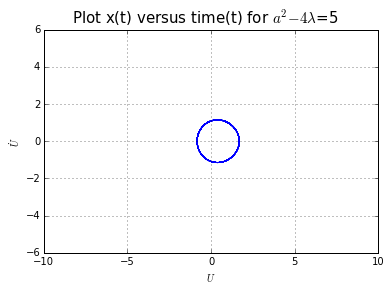

In [25]:
SolFun(a=3, y=1, a_lim=[0, 4, -1 ,1], Sol_Space=[-3, 4], line_den=200)

Illegal input detected (internal error).
Run with full_output = 1 to get quantitative information.


C:\Users\Ados_Laptop\Anaconda3\lib\site-packages\ipykernel\__main__.py:58: RuntimeWarning: divide by zero encountered in double_scalars


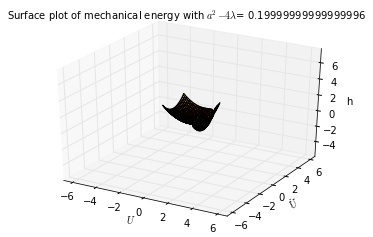

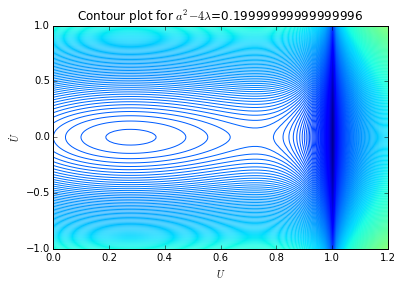

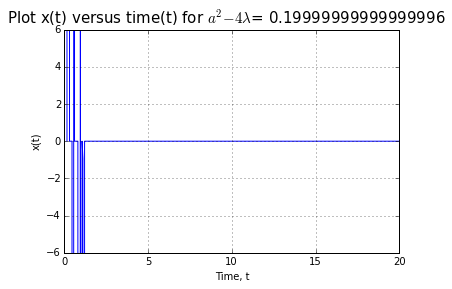

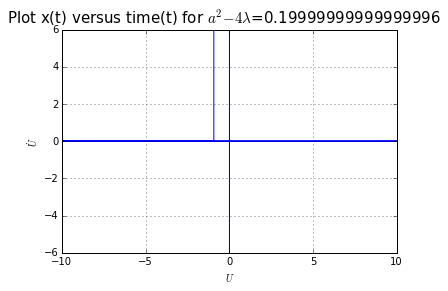

In [31]:
SolFun(a=1, y=0.2, a_lim=[0, 1.2, -1 ,1], Sol_Space=[-1.5, 1.5], line_den=450)